## Columns Description

* કોલમ- 1 Number of times pregnant
* કોલમ- 2  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* કોલમ- 3  Diastolic blood pressure (mm Hg)
* કોલમ- 4  Triceps skin fold thickness (mm)
* કોલમ- 5  2-Hour serum insulin (mu U/ml)
* કોલમ- 6 Body mass index (weight in kg/(height in m)^2)
* કોલમ- 7 Diabetes pedigree function
* કોલમ- 8 Age (years)
* કોલમ- 9 Outcomes

## import libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load dataset

In [92]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\diabetes.csv")

In [93]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Size of the Dataset

In [94]:
print("Size of the dataset : ",df.shape)

Size of the dataset :  (768, 9)


**અહી  ડેટા માં ૭૬૮ રો છે. અને  ૯ કોલમ  છે .**

In [95]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### અહી ટાર્ગેટ વેરિયેબલ કોલમ ૯ છે. ( Outcomes )

## Clean dataset

**પેહલા પાંચ ડેટા**

In [96]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### આ ડેટાસેટ માં Numeric and Categorical કોલમ કઈ છે તે માટે 

### Numeric column :

In [97]:
#jema include=np.number thi only Numerical column return karshe
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns : \n\n",df[numerical_col].head(5))

Numerical columns : 

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


આ ડેટાસેટ માં કુલ ૯ કોલમ છે તે Numeric છે. અને તે નીચે મુજબ ની છે . 

In [98]:
print("Pregnancies\nGlucose\nBloodPressure\nSkinThickness\nInsulin\nBMI\nDiabetesPedigreeFunction\nAge\nOutcome")

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


### Categorical column : 

In [99]:
# jema excluide=np.number thi only categorical column return karshe
categorical_col = df.select_dtypes(exclude=np.number).columns.tolist()
print("Categorical columns : \n\n",df[categorical_col].head(5))

Categorical columns : 

 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


### Column ની Type

In [100]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**ઉપર થી ખબર પડી કે ડેટાસેટ માં ૭ Integer અને ૨ float કોલમ છે.**

## Check Missing values

In [101]:
total_missing_val = df.isnull().sum().sort_values(ascending=False)


આ ડેટાસેટ માં જેટલી Missing Values ( આટલે કે ખાલી કે જ્યાં કોઈ કિમત જ નથી ) તેમણે કોલમ વાઇસ ચેક કર્યું . અને તેને total_missing_val નામના વેરિયેબલ માં મૂક્યું. 

In [102]:
percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

df.isnull().sum() : આ રિટર્ન કરશે કે કોલમ માં કેટલી ખાલી જગ્યા છે કે જય કોઈ કિમત છે જ ની 

df.isnull().count() : આ રિટર્ન કરશે Trur & False એટલે કે તે બંને ને કાઉન્ટ કરશે અને તેમની સંખ્યા ટોટલ જેટલી હશે . 

Percentage શોધવા માટે આ બંને નો રેશિયો શોધવો પડે અને તે Percentage veriable માં છે. 

In [103]:
missinf_data = pd.concat([total_missing_val , percentage], axis=1 , keys = ['Missing Value','Percentage'])
print(missinf_data)

                          Missing Value  Percentage
Pregnancies                           0         0.0
Glucose                               0         0.0
BloodPressure                         0         0.0
SkinThickness                         0         0.0
Insulin                               0         0.0
BMI                                   0         0.0
DiabetesPedigreeFunction              0         0.0
Age                                   0         0.0
Outcome                               0         0.0


આ બંને total_missing_val અને percentage ને concat કરવા માં આવ્યા જેથી  આગળ તેમની જરૂર પડે તો અહિયાં થી લઈ શકે. 

#### આના પરથી ખબર પડી કે આ ડેટાસેટ માં એક પણ Missing values નથી . 

## drop feature having missing values more than 60%

In [104]:
df = df.drop((missinf_data[missinf_data['Percentage'] > 0.6]).index , axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


એકપણ કોલમ માં 60% થી ઉપર Percentage નથી એકલે કઈ ફેરફાર નઇ થાય . 

## Find zero value

In [105]:
for i in df.columns:
    num = df[i][df[i]==0].count()
    print(i , num)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


કોલમ વાઇસ માં કેટલી જીરો વેલ્યુ છે તે ખબર પડી.

જરૂરીયાત ની કોલમ 

In [106]:
print("Pregnancies\nGlucose\nBloodPressure\nSkinThickness\nInsulin\nBMI")

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI


## Replace zero values with NaN

એટલે કે કોલમ માં જ્યાં 0 છે ત્યાં NaN કરી દેવું પડે કારણ કે તેમણે ફિલ કરવા માં સરળતા પડે. 

In [107]:
none_zero = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

for col in none_zero:
    df[col] = df[col].replace(0 , np.NaN)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


એક detaframe ત્યાર કરીશું જેમાં Nan value નો sum કરીશું અને તેમને desending order માં કરીશું . 

In [108]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False))

In [109]:
nulls

,0
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
Pregnancies,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


આ કોલમ ને નામ આપીશું 

In [110]:
nulls.columns = ['Null Count']

જે કોલમ માં Nan values નથી તેમનું કશું કામ નથી એટલે તેને consider નઇ કરીએ . 


In [111]:
nulls = nulls[nulls > 0]

જે Nan  values  વાડી કોલમ છે તેમના નામ ને ઇંડેક્સ આવસે તો તેમને પણ નામ આપવું પડશે. 

In [112]:
nulls.index.name = 'Feature'

In [113]:
nulls

,Null Count
Feature,
Insulin,374.0
SkinThickness,227.0
BloodPressure,35.0
BMI,11.0
Glucose,5.0
Pregnancies,NaN
DiabetesPedigreeFunction,NaN
Age,NaN
Outcome,NaN


હવે ઉપર થી જેમાં Nan values છે તેમાં તેને mean (નોન જીરો વેલ્યુ નો ) થી replace કરીશું . 

In [114]:
for column in nulls[nulls["Null Count"]> 0].index:
    df[column].fillna(df[column].mean(), inplace = True)

In [115]:
nulls

,Null Count
Feature,
Insulin,374.0
SkinThickness,227.0
BloodPressure,35.0
BMI,11.0
Glucose,5.0
Pregnancies,NaN
DiabetesPedigreeFunction,NaN
Age,NaN
Outcome,NaN


### check Nan Values fill or not ?

In [116]:
df. head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


જે Nan  values હતી એ mean() ની મદદ થી ફિલ થાય ગઈ .

In [117]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Detect outliers

In [118]:
def OutLier_col(dataframe,column):
    q1 = dataframe[column].quantile(0.25) 

    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
                
    fence_low = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)

    print("fence_low:",fence_low)
    print("fence_high:",fence_high)

    print("First Quatile:",q1)
    print("Third Quatile:",q3)

    print("IQR value:",iqr)

    df_filtered = dataframe[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)]
    return df_filtered

In [119]:
df_outlier=OutLier_col(df,'BloodPressure')
df_outlier

fence_low: 40.0
fence_high: 104.0
First Quatile: 64.0
Third Quatile: 80.0
IQR value: 16.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.00000,83.000000,43.3,0.183,33,0
43,9,171.0,110.0,24.00000,240.000000,45.4,0.721,54,1
84,5,137.0,108.0,29.15342,155.548223,48.8,0.227,37,1
106,1,96.0,122.0,29.15342,155.548223,22.4,0.207,27,0
125,1,88.0,30.0,42.00000,99.000000,55.0,0.496,26,1
177,0,129.0,110.0,46.00000,130.000000,67.1,0.319,26,1
362,5,103.0,108.0,37.00000,155.548223,39.2,0.305,65,0
549,4,189.0,110.0,31.00000,155.548223,28.5,0.680,37,0
597,1,89.0,24.0,19.00000,25.000000,27.8,0.559,21,0
599,1,109.0,38.0,18.00000,120.000000,23.1,0.407,26,0


### All

In [120]:
outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers', 'Values of Outliers']) 

outliers_list = [] 

for column in df.select_dtypes(include=np.number).columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)
    num_outliers = df.loc[(df[column] < fence_low) | (df[column] > fence_high), column]
    outliers_list.append((column, len(num_outliers), num_outliers.tolist()))  

for entry in outliers_list:
    outliers = outliers._append({'Feature': entry[0], 'Number of Outliers': entry[1], 'Values of Outliers': entry[2]}, ignore_index=True)

outliers

,Feature,Number of Outliers,Values of Outliers
0,Pregnancies,4,"[15, 17, 14, 14]"
1,Glucose,0,[]
2,BloodPressure,14,"[30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0..."
3,SkinThickness,87,"[45.0, 47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 13...."
4,Insulin,164,"[543.0, 846.0, 230.0, 235.0, 245.0, 54.0, 207...."
5,BMI,8,"[53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]"
6,DiabetesPedigreeFunction,29,"[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4,..."
7,Age,9,"[69, 67, 72, 81, 67, 67, 70, 68, 69]"
8,Outcome,0,[]


### Handle the outliers

In [121]:
Outlier_list = df.columns.to_list()

def Outlier_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    Outlier_low = q1 - (1.5 * iqr)
    Outlier_high = q3 + (1.5 * iqr)
    return Outlier_low, Outlier_high

for col in Outlier_list:
    Outlier_low, Outlier_high = Outlier_range(df, col)
    df.loc[(df[col] < Outlier_low) | (df[col] >Outlier_high ), col] = np.nan
    df[col].fillna(df[col].mean(),inplace=True)

# EDA & Data Visualizations

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i + 1]])


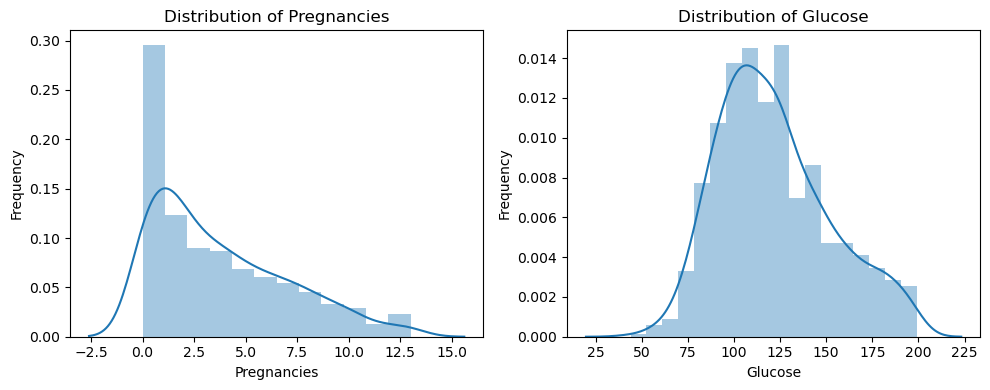

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i + 1]])


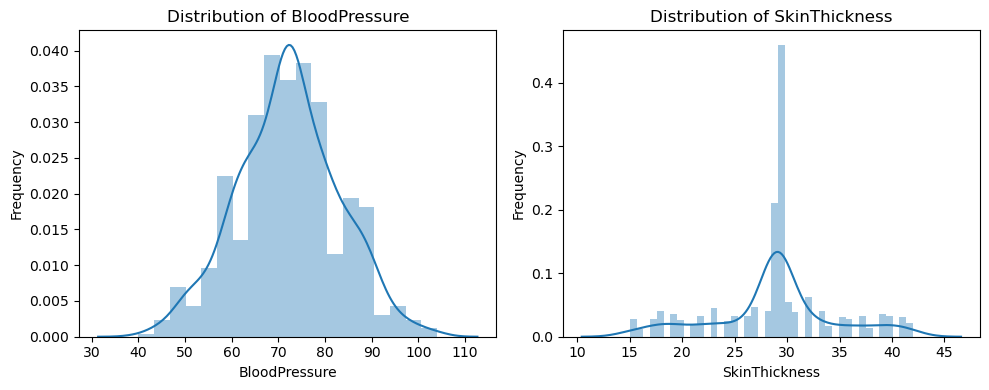

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i + 1]])


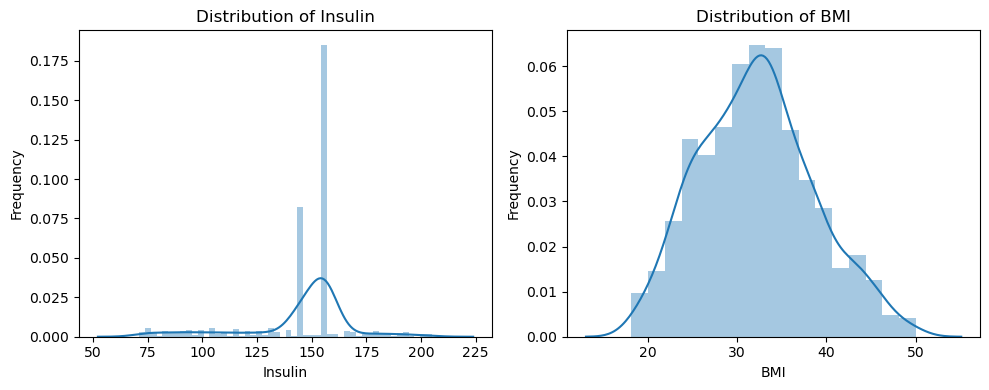

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i + 1]])


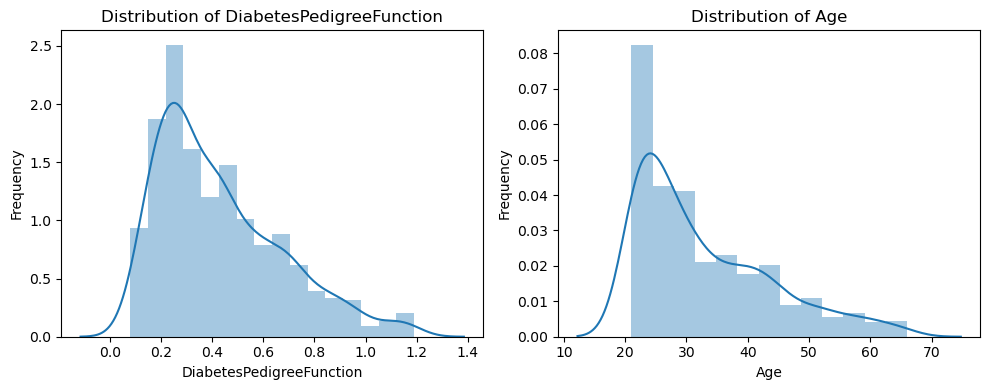

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\4075906331.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_columns[i]])


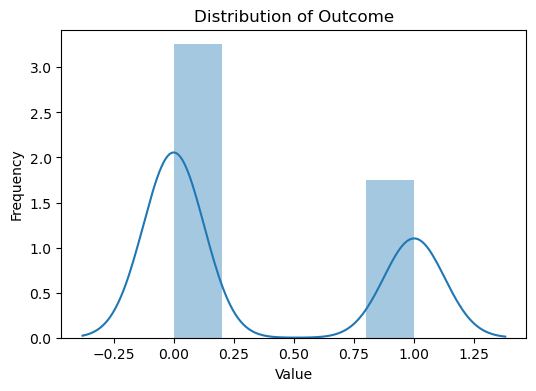

In [122]:
# Get the numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Iterate over numeric columns in pairs
for i in range(0, len(numeric_columns), 2):
    if len(numeric_columns) > i + 1:
        plt.figure(figsize=(10, 4))
        
        # First subplot
        plt.subplot(121)
        sns.distplot(df[numeric_columns[i]])
        plt.title('Distribution of ' + numeric_columns[i])
        plt.xlabel(numeric_columns[i])
        plt.ylabel('Frequency')
        
        # Second subplot
        plt.subplot(122)            
        sns.distplot(df[numeric_columns[i + 1]])
        plt.title('Distribution of ' + numeric_columns[i + 1])
        plt.xlabel(numeric_columns[i + 1])
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

    else:
        # Single subplot if there's an odd number of numeric columns
        plt.figure(figsize=(6, 4))
        sns.distplot(df[numeric_columns[i]])
        plt.title('Distribution of ' + numeric_columns[i])
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        
        plt.show()

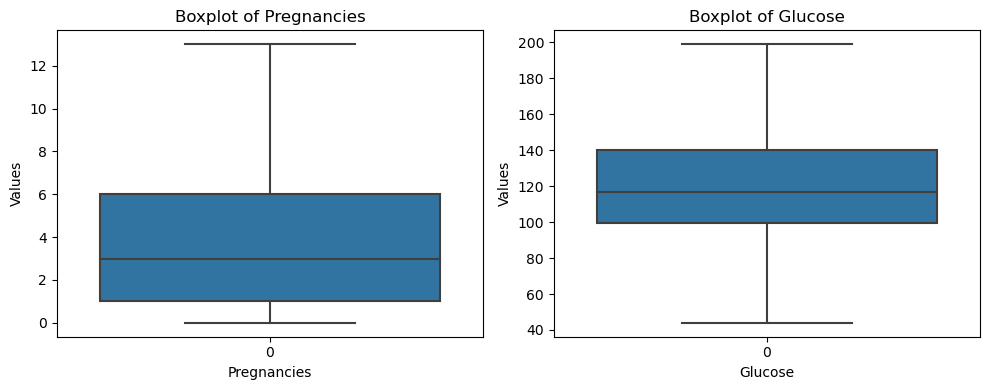

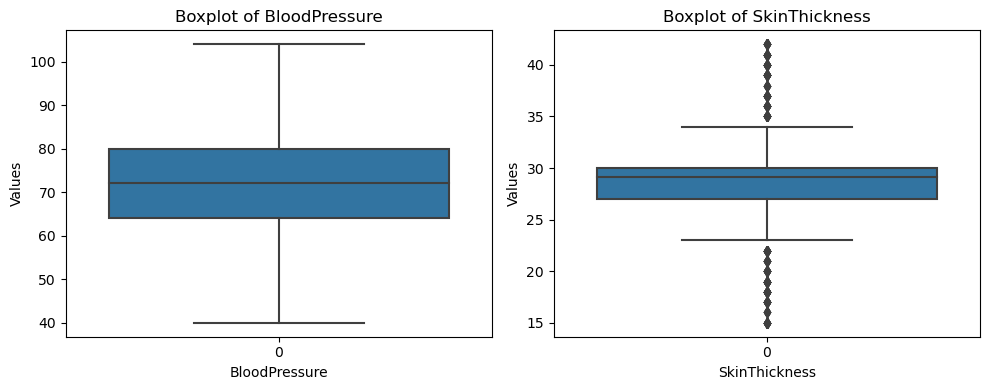

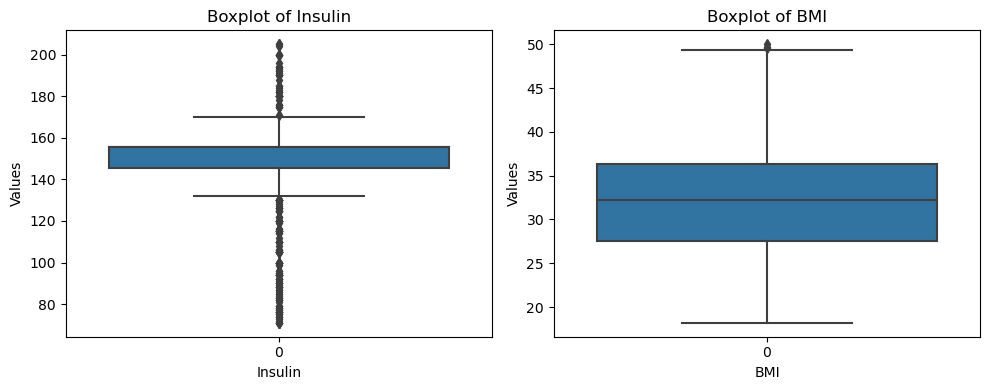

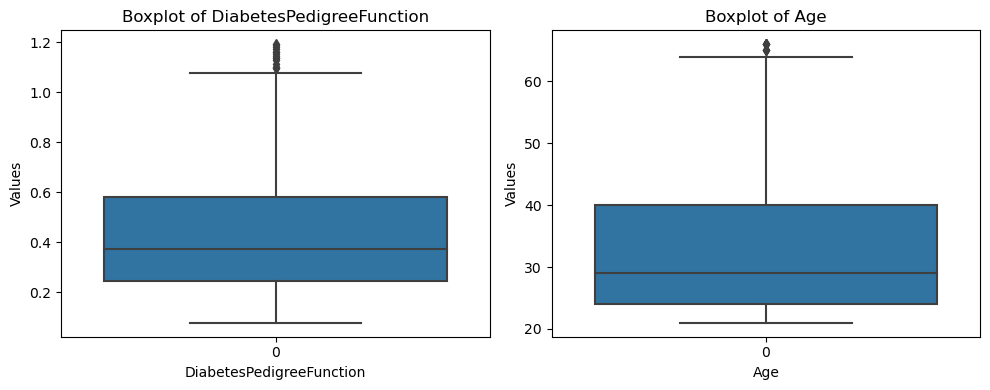

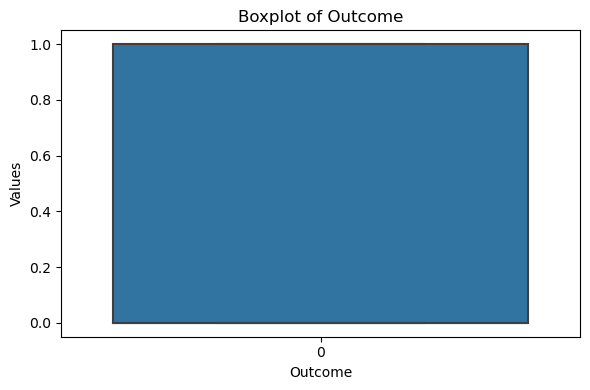

In [123]:
# Code to plot boxplots
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Iterate over numeric columns in pairs
for i in range(0, len(numeric_columns), 2):
    if len(numeric_columns) > i+1:
        plt.figure(figsize=(10, 4))
        
        # First subplot
        plt.subplot(121)
        sns.boxplot(df[numeric_columns[i]])
        plt.title("Boxplot of " + numeric_columns[i])  # Set the title for the first subplot
        plt.xlabel(numeric_columns[i])  # Set the x-axis label
        plt.ylabel("Values")  # Set the y-axis label
        
        # Second subplot
        plt.subplot(122)            
        sns.boxplot(df[numeric_columns[i+1]])
        plt.title("Boxplot of " + numeric_columns[i+1])  # Set the title for the second subplot
        plt.xlabel(numeric_columns[i+1])  # Set the x-axis label
        plt.ylabel("Values")  # Set the y-axis label
        
        plt.tight_layout()  # Adjust subplots to prevent overlap
        plt.show()  # Display the subplots

    else:
        # Single subplot if there's an odd number of numeric columns
        plt.figure(figsize=(6, 4))
        sns.boxplot(df[numeric_columns[i]])
        plt.title("Boxplot of " + numeric_columns[i])  # Set the title for the single subplot
        plt.xlabel(numeric_columns[i])  # Set the x-axis label
        plt.ylabel("Values")  # Set the y-axis label
        
        plt.tight_layout()  # Adjust subplot to prevent overlap
        plt.show()  # Display the subplot

# Observations 

#### Training and Testing Set
Split the data into traning and Testing set 

In [124]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:8]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0, stratify=y)

x માં ડેટાસેટ માંથી માત્ર training data જ હશે. કારણ કે ડેટાસેટ માંથી ટાર્ગેટ વેરિયેબલ સિવાય નો બધો ડેટા છે તે training data  છે.

y  માં માત્ર Testing data હશે .

In [125]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
163,2.0,100.0,64.0,23.00000,155.548223,29.7,0.368,21.0
192,7.0,159.0,66.0,29.15342,155.548223,30.4,0.383,36.0
246,10.0,122.0,68.0,29.15342,155.548223,31.2,0.258,41.0
160,4.0,151.0,90.0,38.00000,155.548223,29.7,0.294,36.0
757,0.0,123.0,72.0,29.15342,155.548223,36.3,0.258,52.0
...,...,...,...,...,...,...,...,...
456,1.0,135.0,54.0,29.15342,155.548223,26.7,0.687,62.0
93,4.0,134.0,72.0,29.15342,155.548223,23.8,0.277,60.0
398,3.0,82.0,70.0,29.15342,155.548223,21.1,0.389,25.0
696,3.0,169.0,74.0,19.00000,125.000000,29.9,0.268,31.0


In [126]:
y_train

163    0.0
192    1.0
246    0.0
160    0.0
757    1.0
      ... 
456    0.0
93     1.0
398    0.0
696    1.0
294    0.0
Name: Outcome, Length: 691, dtype: float64

**K ની value ને નક્કી કરવા માટે testing data નો sqare લેવામાં આવે છે તેના પરથી ખબર પડશે ક k  ની value કેટલી રાખવી .**

In [127]:
import math
math.sqrt(len(y_test))

8.774964387392123

આ પરથી સાબિત થાય કે k ની value 8 સુધી માં રાખી સકીએ. 

# KNN Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [129]:
y_pred =  model.predict(x_test)
y_pred

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1.])

C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\3119943880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Outcome'], hist=False, color="r", label="Actual Value")
C:\Users\Admin\AppData\Local\Temp\ipykernel_19072\3119943880.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

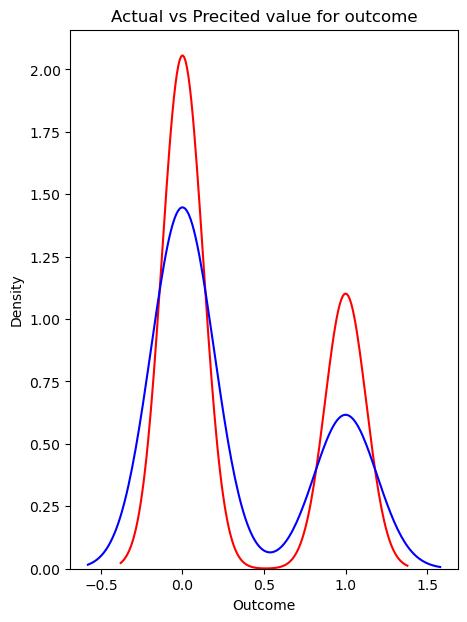

In [130]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In [131]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy :  81.81818181818183 %


### Find Outliers

- True Negatives (TN): The number of instances from the negative class (Class 0) that are correctly classified as negative by the model.
- False Positives (FP): The number of instances from the negative class (Class 0) that are incorrectly classified as positive by the model.
- False Negatives (FN): The number of instances from the positive class (Class 1) that are incorrectly classified as negative by the model.
- True Positives (TP): The number of instances from the positive class (Class 1) that are correctly classified as positive by the model.
- To better understand these terms:

- Class 0 (Negative class): Represents the instances of the negative class in our classification problem.
True Negatives (TN): The model correctly identifies these instances as negative.
False Positives (FP): The model incorrectly identifies these instances as positive.
- Class 1 (Positive class): Represents the instances of the positive class in our classification problem.
False Negatives (FN): The model incorrectly identifies these instances as negative.
True Positives (TP): The model correctly identifies these instances as positive.

In [133]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)


y_test = np.squeeze(y_test)
y_pred = np.squeeze(y_pred)

test = (y_test == y_pred)

# Create the 'final' DataFrame
final = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'test': test})
final

Confusion Matrix:
 [[45  5]
 [ 9 18]]


,y_test,y_pred,test
546,1.0,1.0,True
27,0.0,0.0,True
267,0.0,0.0,True
554,0.0,0.0,True
526,0.0,0.0,True
...,...,...,...
80,0.0,0.0,True
109,1.0,0.0,False
495,0.0,1.0,False
199,1.0,0.0,False


### Manual Function for k-Fold Cross Validation
In machine learning, k-Fold Cross Validation is a technique used to assess the performance of a model by dividing the data into k subsets or "folds." The model is trained on k-1 folds and validated on the remaining fold, and this process is repeated k times, each time using a different fold as the validation set. The final performance metric is averaged over the k iterations.

To implement k-Fold Cross Validation manually, we can create a function that takes the following parameters:

- Dataframe: The input DataFrame containing the feature set.
- target_column: The name of the column representing the target variable.
- metric_technique: The evaluation metric technique used to assess the model's performance, such as accuracy, precision, recall, or F1-score.
- n_neighbors: The number of neighbors to consider in the KNN (K-Nearest Neighbors) algorithm.
- k (fold): The number of folds to perform in the cross-validation process.

In [135]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

def k_fold_cross_validation(df, target_column, metric_tech='minkowski', k=5, n_neighbors=5):

    n_samples = len(df)
    fold_size = n_samples // k  #floor division
    accuracy_list = []

    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size

        # Prepare the training and testing sets for this fold
        df_train = pd.concat([df.iloc[:start], df.iloc[end:]], axis=0)
        df_test = df.iloc[start:end]

        X_train = df_train.drop(target_column, axis=1)
        y_train = df_train[target_column]
        X_test = df_test.drop(target_column, axis=1)
        y_test = df_test[target_column]

        model= KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric_tech)

        # Fit the model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(y_pred == y_test)
        accuracy_list.append(accuracy)

    average_accuracy = np.mean(accuracy_list)

    return accuracy_list, average_accuracy

In [141]:
accuracy_list, average_accuracy = k_fold_cross_validation(df, 'Outcome', metric_tech='euclidean', n_neighbors=12, k=10) 

# Display the results
print("Accuracy Scores:", accuracy_list)
print("\n\nAverage Accuracy:", average_accuracy*100,"%")

Accuracy Scores: [0.6578947368421053, 0.7894736842105263, 0.6842105263157895, 0.6052631578947368, 0.75, 0.7763157894736842, 0.8026315789473685, 0.8026315789473685, 0.7236842105263158, 0.8289473684210527]


Average Accuracy: 74.21052631578947 %
